In [124]:
# Load Packages
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

In [125]:
# load window methylation data
A = pd.read_csv("Window_Meth.csv")
# load window methylation data for chromosome 1
# A = pd.read_csv("Window_chr_Meth.csv")
# load folate data
B = pd.read_csv("Folate_placenta.csv")
# remove row without enough coverage
A = A[~(A == 0).any(axis=1)]

In [148]:
# Matrix and modify data structure
n_tr = 70
n_te = 17
m = len(A)

X_tr = np.zeros((n_tr,m))
y_tr = np.zeros(n_tr)

A1 = A.values
A2 = A1[:,1:]
A3 = A2.astype(np.float)
A4 = A3.transpose()

B1 = B.values
B2 = B1[:,1]
B3 = B2.astype(np.float)

B1 = B.values
B2 = B1[:,1]
B3 = B2.astype(np.float)

In [149]:
# Random shuffle samples to seperate training and testing set
ind = list(range(87))
random.seed(20)
random.shuffle(ind)
ind_tr = ind[:70]
ind_te = ind[70:]

X_tr = A4[ind_tr,:]
X_te = A4[ind_te,:]
y_tr = B3[ind_tr]
y_te = B3[ind_te]

In [150]:
# scale data
from sklearn.preprocessing import scale
X_tr = scale(X_tr)
X_te = scale(X_te)
y_tr = scale(y_tr)
y_te = scale(y_te)

## Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_tr, y_tr)

In [6]:
Regre_pred = reg.predict(X_te)

In [7]:
# R2 score
from sklearn.metrics import r2_score
r2_score(y_te, Regre_pred, multioutput='variance_weighted')

0.07663394373648114

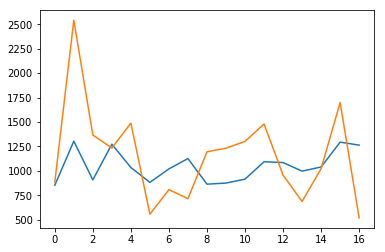

In [8]:
plt.plot(range(17),Regre_pred)
plt.plot(range(17),y_te)
plt.show()

## Nearest neighbors

In [13]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2, p = 7, weights = 'distance')
neigh.fit(X_tr, y_tr) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=7,
          weights='distance')

In [14]:
neigh_pred = neigh.predict(X_te)

In [15]:
# R2 score
from sklearn.metrics import r2_score
r2_score(y_te, neigh_pred, multioutput='variance_weighted')

0.39204892958740634

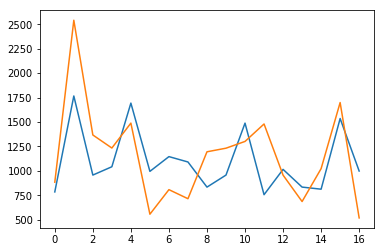

In [16]:
plt.plot(range(17),neigh_pred)
plt.plot(range(17),y_te)
plt.show()

## SVM

In [17]:
from sklearn import svm
from sklearn.svm import SVR
svc = svm.SVR(kernel = 'linear', degree = 2)
svc.fit(X_tr, y_tr)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
svm_pred = svc.predict(X_te)

In [19]:
# R2 score
from sklearn.metrics import r2_score
r2_score(y_te, svm_pred, multioutput='variance_weighted')

0.07684672752567301

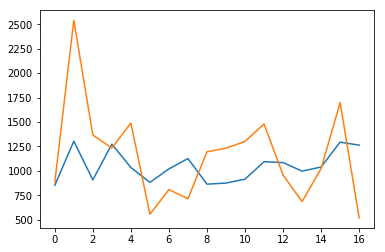

In [20]:
plt.plot(range(17),svm_pred)
plt.plot(range(17),y_te)
plt.show()

## Random Forrest

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=1)
rf.fit(X_tr, y_tr)

/Users/yihui/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [22]:
rf_pred = rf.predict(X_te)

In [23]:
# R2 score
from sklearn.metrics import r2_score
r2_score(y_te, rf_pred, multioutput='variance_weighted')

0.11237155507321395

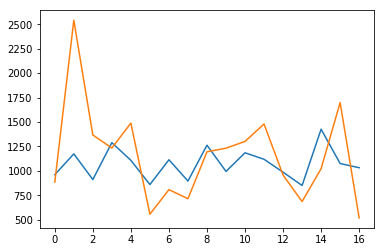

In [24]:
plt.plot(range(17),rf_pred)
plt.plot(range(17),y_te)
plt.show()

## Adaboost

In [25]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
adb = AdaBoostRegressor(learning_rate=2.0, loss='linear')
adb.fit(X_tr,y_tr)

AdaBoostRegressor(base_estimator=None, learning_rate=2.0, loss='linear',
         n_estimators=50, random_state=None)

In [26]:
adb_pred = adb.predict(X_te)

In [27]:
# R2 score
from sklearn.metrics import r2_score
r2_score(y_te, adb_pred, multioutput='variance_weighted')

-0.14127643151890945

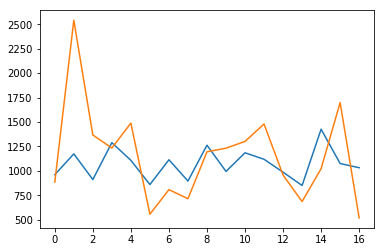

In [28]:
plt.plot(range(17),rf_pred)
plt.plot(range(17),y_te)
plt.show()

## Gaussian Process

In [29]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
# Gaussian Process
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=10).fit(X_tr, y_tr)

In [30]:
gpr_pred = gpr.predict(X_te)

In [31]:
# R2 score
from sklearn.metrics import r2_score
r2_score(y_te, gpr_pred, multioutput='variance_weighted')

0.0743778382107354

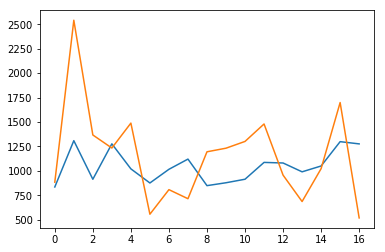

In [32]:
plt.plot(range(17),gpr_pred)
plt.plot(range(17),y_te)
plt.show()

## Decision Tree

In [33]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_leaf_nodes=15)
clf = clf.fit(X_tr, y_tr)

In [34]:
clf_pred = clf.predict(X_te)

In [35]:
# R2 score
from sklearn.metrics import r2_score
r2_score(y_te, clf_pred, multioutput='variance_weighted')

-1.250520666056096

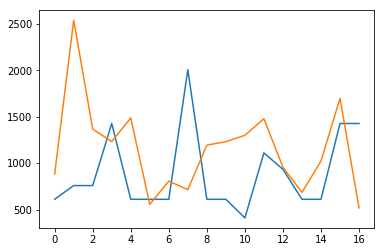

In [36]:
plt.plot(range(17),clf_pred)
plt.plot(range(17),y_te)
plt.show()

## Feature Selection and Feature Importance

In [169]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

In [7]:
# feature extraction for the 0.95 variance
pca = PCA(0.95)
fit = pca.fit(X_tr)

In [170]:
# feature extraction for the top 30
pca = PCA(n_components=30)
fit = pca.fit(X_tr)

In [171]:
train_img = pca.transform(X_tr)
test_img = pca.transform(X_te)
X_tr = train_img
X_te = test_img

In [172]:
X_tr.shape

(70, 30)

## Neural Network
### Adapted from Tensorflow neural network tutorial

In [173]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

In [174]:
# Set mini batches
def random_mini_batches(X, Y, mini_batch_size = 20, seed = 1):
    m = X.shape[1] 
    mini_batches = []
    
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [175]:
# create placeholders
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    return X, Y

In [176]:
X, Y = create_placeholders(30, 1)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_1:0", shape=(30, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(1, ?), dtype=float32)


In [177]:
# one layer
def initialize_parameters():
    W1 = tf.get_variable("W1", [1, 30], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [1, 1], initializer = tf.zeros_initializer())
    parameters = {"W1": W1,
                  "b1": b1}    
    return parameters

In [178]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))

W1 = <tf.Variable 'W1:0' shape=(1, 30) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(1, 1) dtype=float32_ref>


In [179]:
# forward propagation
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    Z1 = tf.add(tf.matmul(W1, X), b1) 
    return Z1

In [180]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(30, 1)
    parameters = initialize_parameters()
    Z1 = forward_propagation(X, parameters)
    print("Z1 = " + str(Z1))

Z1 = Tensor("Add:0", shape=(1, ?), dtype=float32)


In [181]:
# compute cost
def compute_cost(Z1, Y):
    logits = tf.transpose(Z1)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.l2_loss(logits - labels))
    return cost

In [182]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(30, 1)
    parameters = initialize_parameters()
    Z1 = forward_propagation(X, parameters)
    cost = compute_cost(Z1, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [183]:
# R2 score calculator
def R_squared(y, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    r2 = tf.subtract(1.0, tf.div(residual, total))
    return r2

In [184]:
np.std(y_tr)*3

3.0

In [185]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 2000, minibatch_size = 10, print_cost = True, std = 3):
    
    ops.reset_default_graph()                         
    tf.set_random_seed(1)                            
    seed = 3                                          
    (n_x, m) = X_train.shape                          
    n_y = Y_train.shape[0]                            
    costs = []                                       

    X, Y = create_placeholders(n_x, n_y)
    parameters = initialize_parameters()
    Z1 = forward_propagation(X, parameters)
    cost = compute_cost(Z1, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        
        sess.run(init)
        
        for epoch in range(num_epochs):

            epoch_cost = 0.                       
            num_minibatches = int(m / minibatch_size) 
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                (minibatch_X, minibatch_Y) = minibatch               
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        r2 = R_squared(Y, Z1)  
        r2avg = tf.reduce_mean(tf.cast(r2, "float"))

        print("Train R2:", r2avg.eval({X: X_train, Y: Y_train}))
        print("Test R2:", r2avg.eval({X: X_test, Y: Y_test}))
               
        correct_prediction = tf.math.less(tf.abs(Y - Z1), std)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        print("Train accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        b = tf.add(Z1, Z1)/2
        plt.plot(range(17), b.eval({X: X_test, Y: Y_test}).T)
        plt.plot(range(17), Y_test.T)
   
    return parameters

In [186]:
# origize data format for neural network
X_tr = X_tr.T
X_te = X_te.T
y_tr = np.reshape(y_tr,[1,70])
y_te = np.reshape(y_te,[1,17])

Cost after epoch 0: 105719.482701
Cost after epoch 100: 79856.190290
Cost after epoch 200: 59185.130859
Cost after epoch 300: 42926.799386
Cost after epoch 400: 30291.090402
Cost after epoch 500: 20680.618164
Cost after epoch 600: 13558.940151
Cost after epoch 700: 8455.054862
Cost after epoch 800: 4955.165702
Cost after epoch 900: 2690.815369
Cost after epoch 1000: 1344.589347
Cost after epoch 1100: 624.472299
Cost after epoch 1200: 275.769543
Cost after epoch 1300: 115.560923
Cost after epoch 1400: 43.254007
Cost after epoch 1500: 13.469570
Cost after epoch 1600: 4.288666
Cost after epoch 1700: 2.593878
Cost after epoch 1800: 2.453831
Cost after epoch 1900: 2.455107


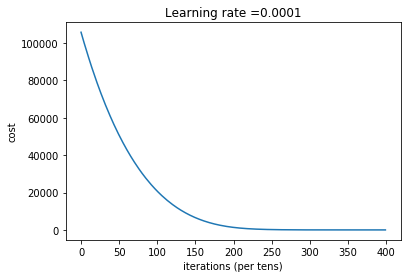

Parameters have been trained!
Train R2: 0.5128269
Test R2: 0.12003732
Train accuracy: 1.0
Test accuracy: 1.0


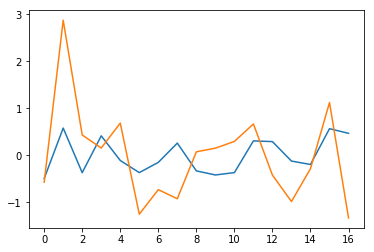

In [187]:
parameters = model(X_tr, y_tr, X_te, y_te)

## Reference

scikit-learn: https://github.com/scikit-learn/scikit-learn

pandas: https://github.com/pandas-dev/pandas

deep learning example: https://github.com/enggen/Deep-Learning-Coursera